<a href="https://colab.research.google.com/github/aad45/MAT421/blob/main/HW11_AadithyaBharadwaj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MAT421 Spring 2025
- Assignment 11, Section 22.4, 22.5, 22.6
- Aadithya Bharadwaj
- arbhara2@asu.edu


##Section 1: Numerical error and instability
- Different step sizes
- Example

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def dydt(t, y):
    return -y

exact_solution = lambda t: np.exp(-t)
t_vals = np.linspace(0, 5, 100)
y_exact = exact_solution(t_vals)

In [3]:
hs = [0.5, 0.2, 0.05]

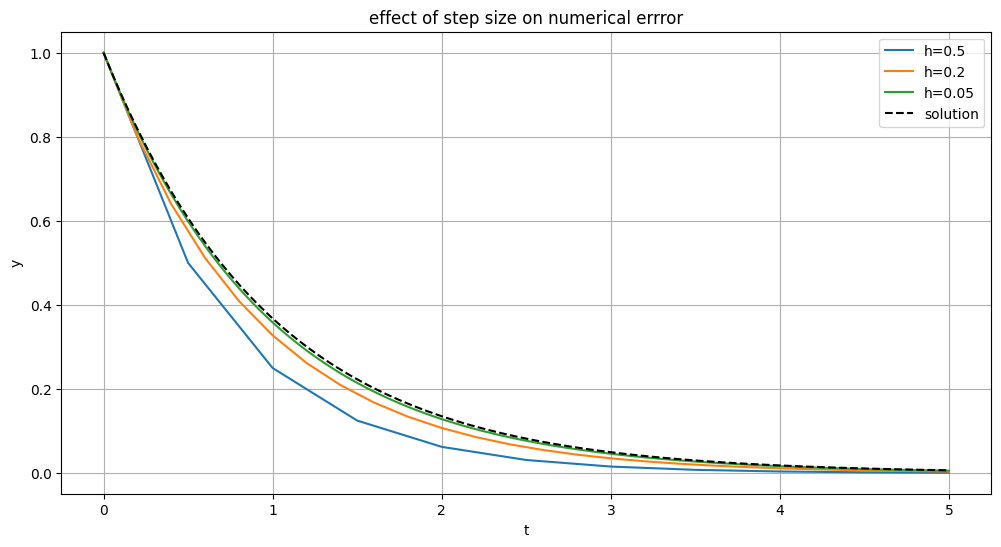

In [4]:
plt.figure(figsize=(12, 6))
for h in hs:
    t = np.arange(0, 5 + h, h)
    y = np.zeros(len(t))
    y[0] = 1
    for i in range(1, len(t)):
        y[i] = y[i-1] + h * dydt(t[i-1], y[i-1])
    plt.plot(t, y, label=f'h={h}')

plt.plot(t_vals, y_exact, 'k--', label= 'solution')
plt.title('effect of step size on numerical errror')
plt.xlabel('t')
plt.ylabel('y')
plt.grid(True)
plt.legend()
plt.show()

##Section 2: Predictor - Corrector Method
- Example using heuns method


In [5]:
def heuns_method(f, y0, t):
    y = np.zeros(len(t))
    y[0] = y0
    for i in range(1, len(t)):
        h = t[i] - t[i-1]
        y_pred = y[i-1] + h * f(t[i-1], y[i-1])  # Predictor (Euler)
        y[i] = y[i-1] + h/2 * (f(t[i-1], y[i-1]) + f(t[i], y_pred))  # Corrector (Trapezoid)
    return y

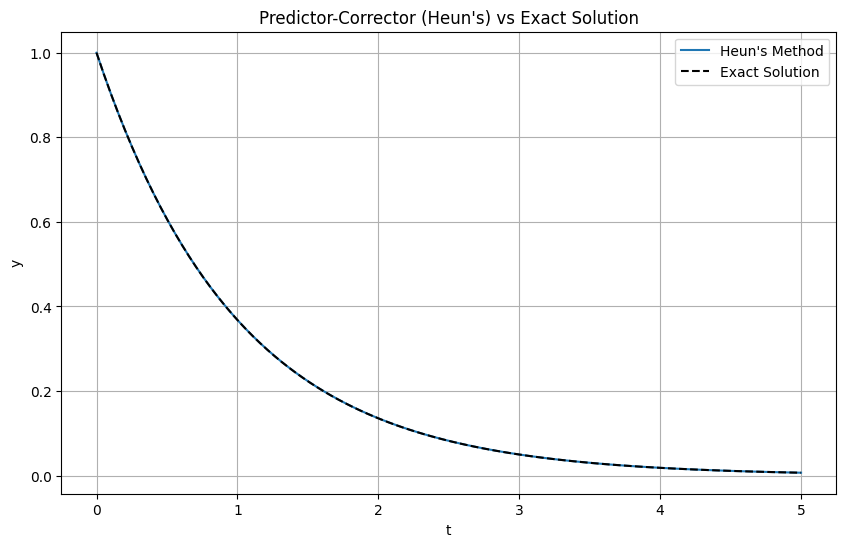

In [6]:
t_pc = np.linspace(0, 5, 100)
y_heun = heuns_method(dydt, 1, t_pc)

plt.figure(figsize=(10, 6))
plt.plot(t_pc, y_heun, label="Heun's Method")
plt.plot(t_vals, y_exact, 'k--', label='Exact Solution')
plt.title("Predictor-Corrector (Heun's) vs Exact Solution")
plt.xlabel("t")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()